<a href="https://colab.research.google.com/github/wantepim84/machine-learning-and-deep-learning/blob/main/Creating_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist #load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape


(60000, 28, 28)

In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
train_images[0,23,23] # one pixel

194

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

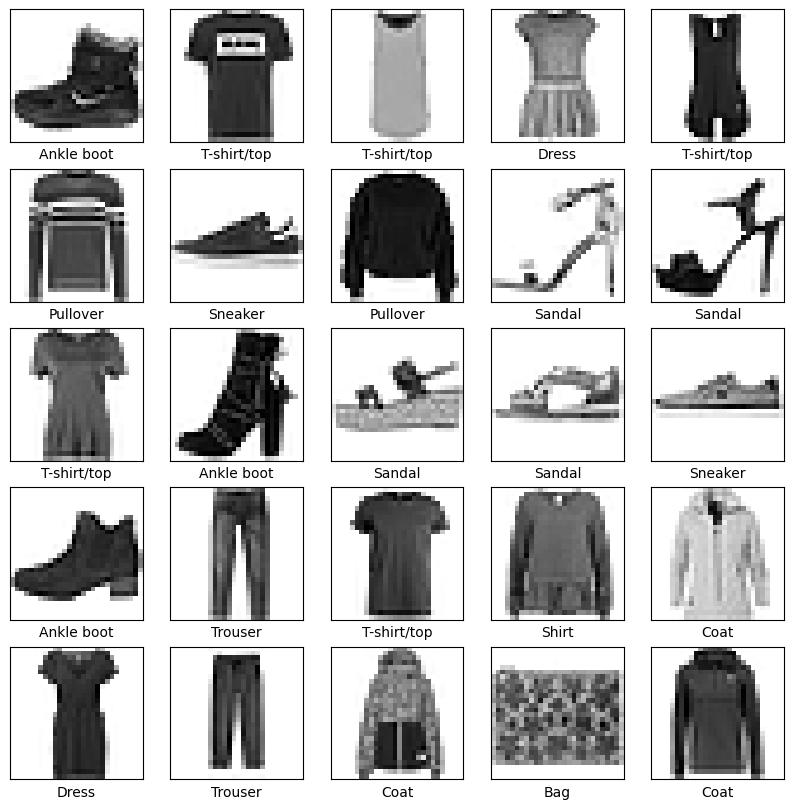

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

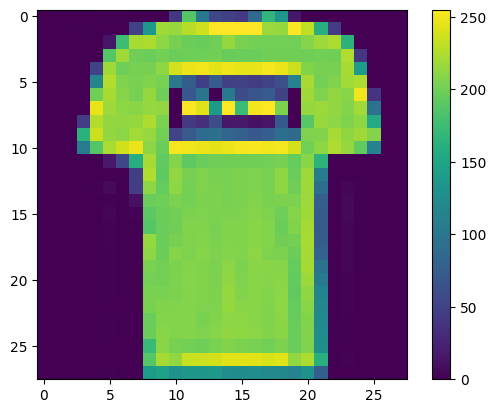

In [ ]:
#Preprocess the data
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#Data preprocessing
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
#Building the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (1)
    tf.keras.layers.Dense(128, activation='relu'), # hidden layer (2)
    tf.keras.layers.Dense(10, activation= 'softmax') # output layer (3)
])

In [ ]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#Training the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 10s 5ms/step - loss: 0.4950 - accuracy: 0.8263
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3684 - accuracy: 0.8667
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3336 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3102 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2951 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2791 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2659 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2564 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2463 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2389 - accura

In [ ]:
#Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 - 1s - loss: 0.3413 - accuracy: 0.8778 - 646ms/epoch - 2ms/step

Test accuracy: 0.8777999877929688


In [ ]:
#Making predictions
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

313/313 [==============================] - 1s 2ms/step
Trouser


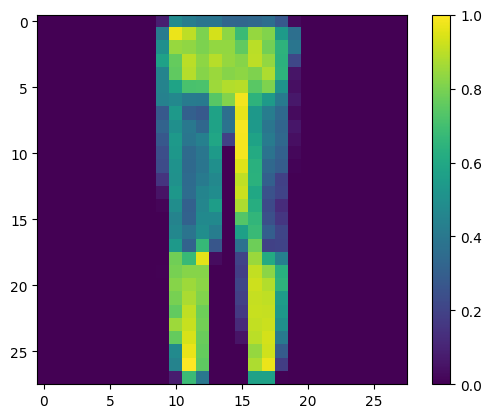

In [ ]:
predictions = probability_model.predict(test_images)
print(class_names[np.argmax(predictions[3])])
plt.figure()
plt.imshow(test_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

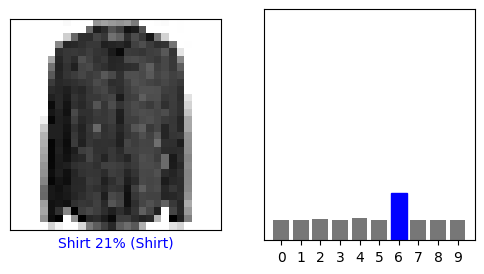

In [ ]:
#Verify predictions
#method1
i = 44
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

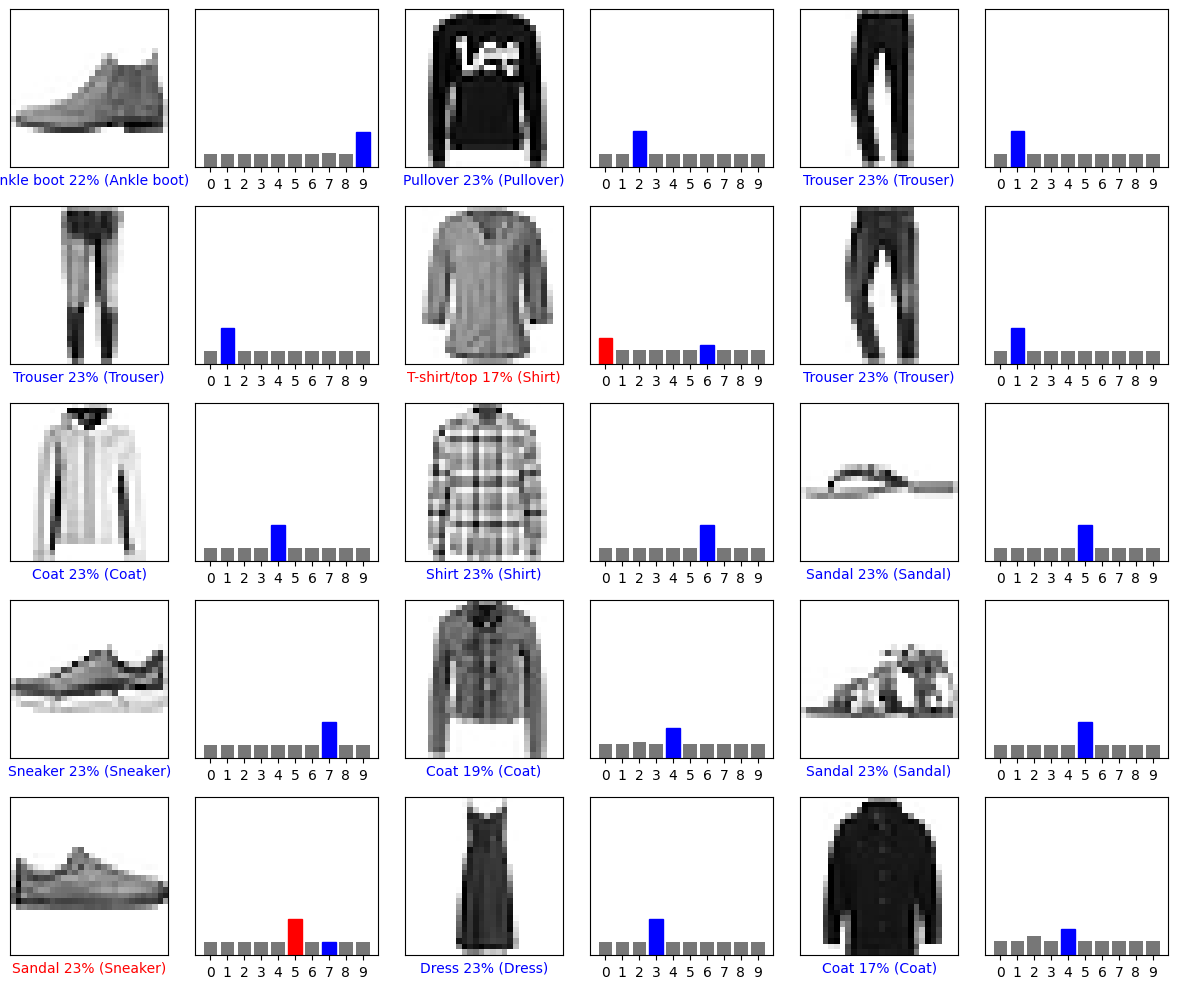

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Pick a number: 34
1/1 [==============================] - 0s 21ms/step


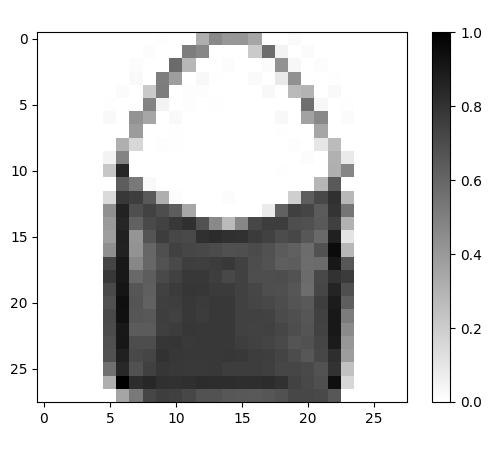

In [ ]:
#method2
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Expected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num= int(num)
      if 0<= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num= get_number()
image= test_images[num]
label= test_labels[num]
predict(model,image, label)
